#### Data was obtained from Kaggle URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

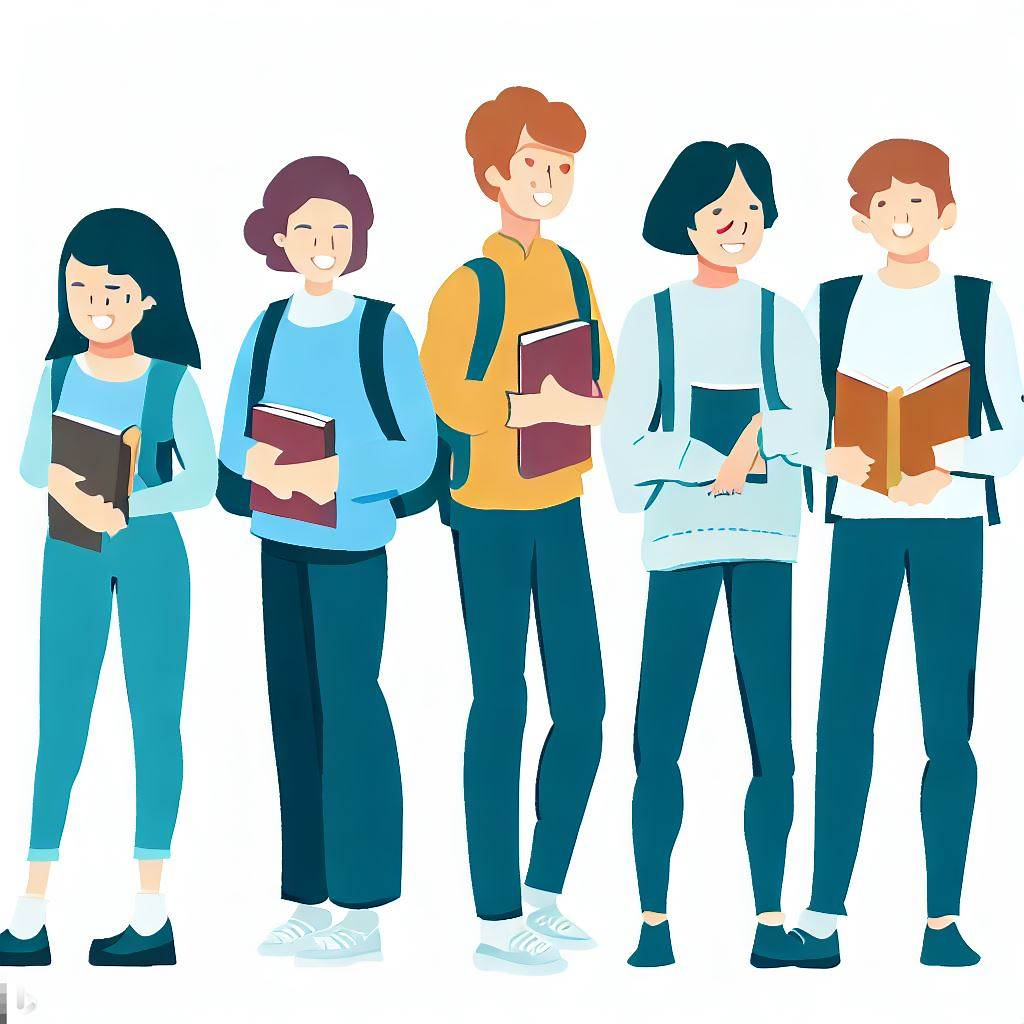

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Student_Performance.csv")

### Understanding Student performance and prediction

In [3]:
dataset.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


#### Checking for missing data

In [4]:
print(dataset.isna().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


<AxesSubplot:>

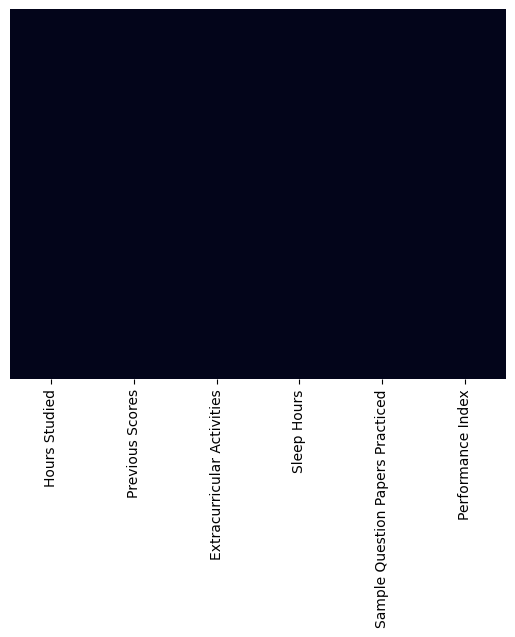

In [5]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False)

## Exploratory Data

In [6]:
dataset.shape

(10000, 6)

In [7]:
dataset.describe().style.background_gradient(cmap='Reds')

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Data Visualization

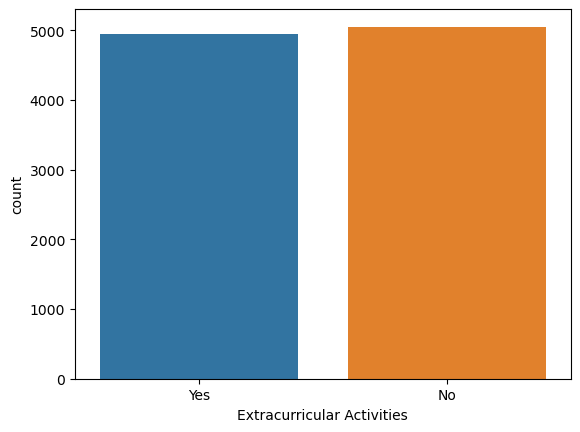

In [8]:
sns.countplot(x=dataset["Extracurricular Activities"])
plt.show()

> It is evenly distributed for "Extracurricular Acitivities" feature

<AxesSubplot:xlabel='Performance Index'>

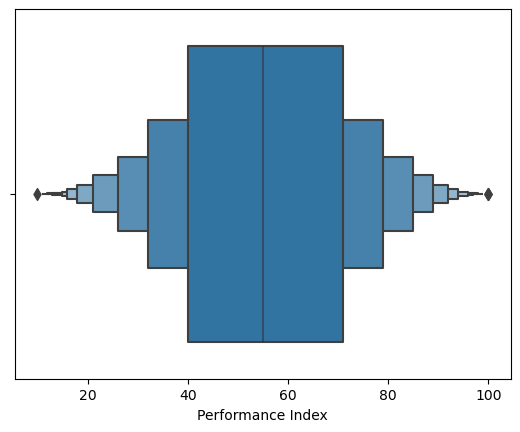

In [9]:
sns.boxenplot(x=dataset["Performance Index"])

<AxesSubplot:xlabel='Performance Index', ylabel='Count'>

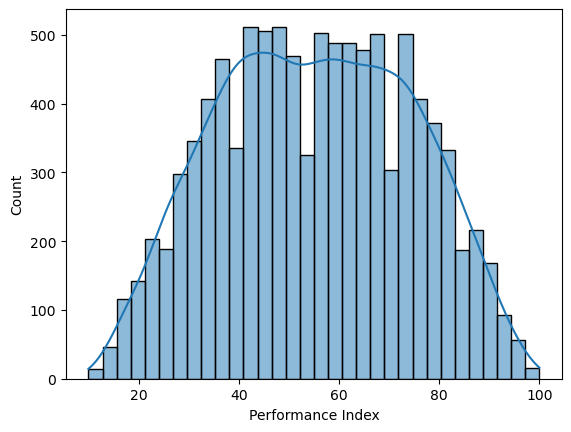

In [10]:
sns.histplot(data=dataset, x="Performance Index", kde=True)

> Distribution of Performance Index

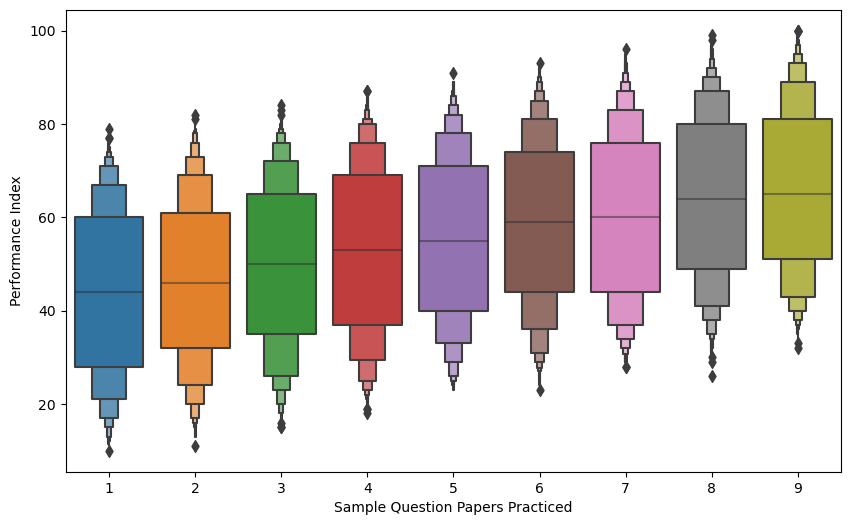

In [11]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxen plot
sns.boxenplot(data=dataset, x="Hours Studied", y="Performance Index", k_depth="trustworthy")

# Set x-axis label
plt.xlabel("Sample Question Papers Practiced")

# Set y-axis label
plt.ylabel("Performance Index")

# Show the plot
plt.show()

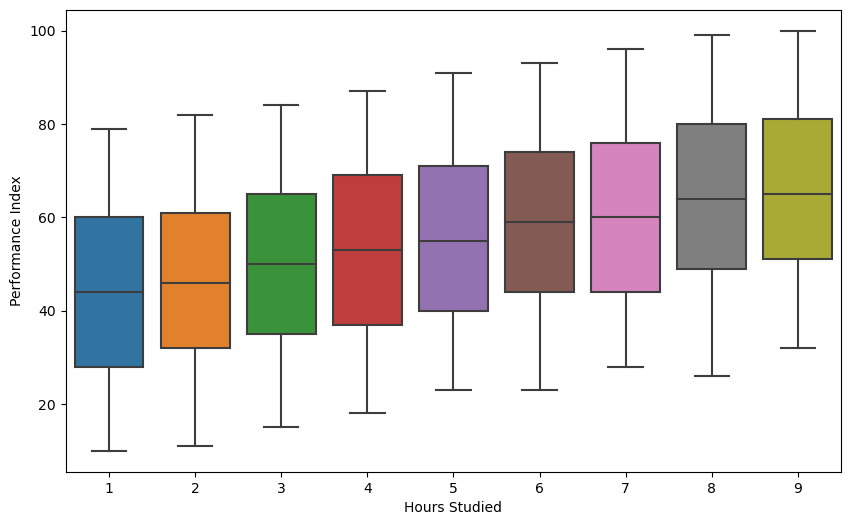

In [12]:
# Set the figure size
plt.figure(figsize=(10, 6))

sns.boxplot(data=dataset, x="Hours Studied", y="Performance Index")

# Set x-axis label
plt.xlabel("Hours Studied")

# Set y-axis label
plt.ylabel("Performance Index")

# Show the plot
plt.show()

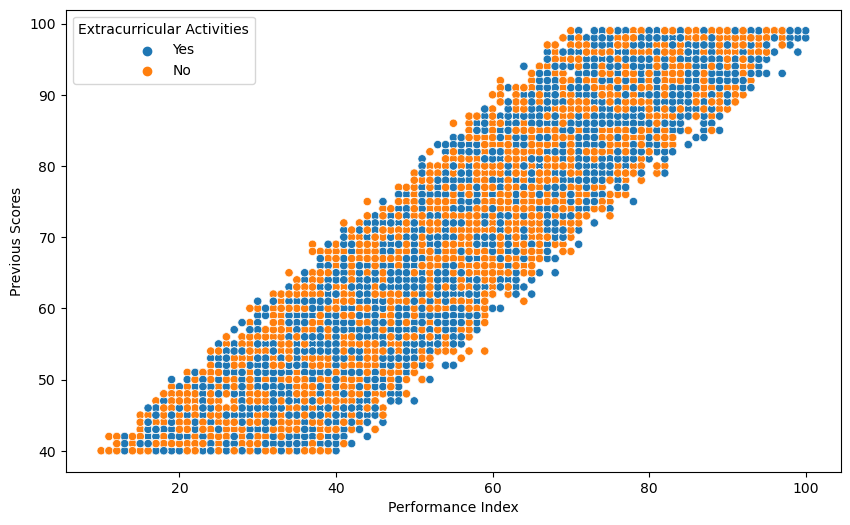

In [13]:
# Set the figure size
plt.figure(figsize=(10, 6))

sns.scatterplot(data=dataset, x="Performance Index", y="Previous Scores", hue="Extracurricular Activities")

# Set x-axis label
plt.xlabel("Performance Index")

# Set y-axis label
plt.ylabel("Previous Scores")

# Show the plot
plt.show()

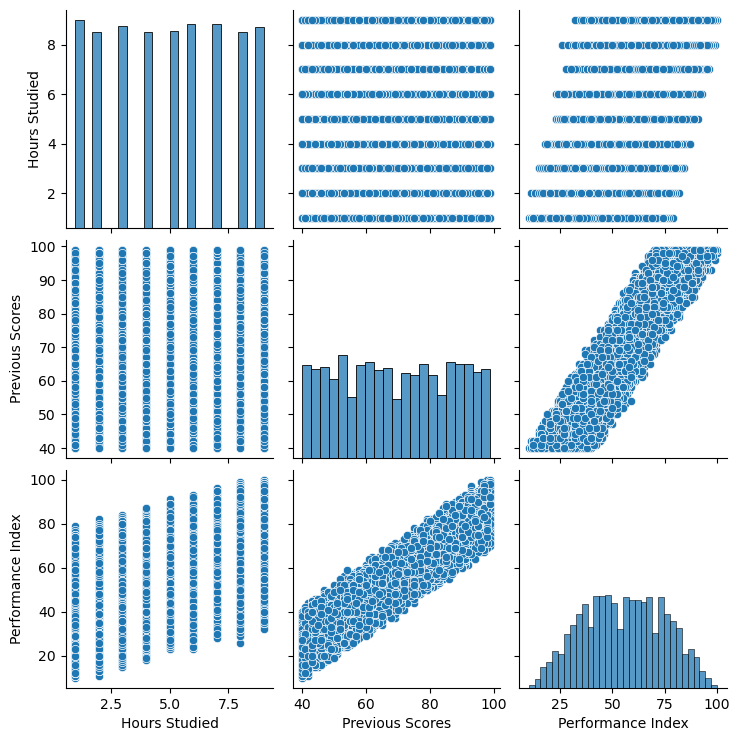

In [14]:
# Visualize pairwise relationships between the numerical variables
sns.pairplot(dataset[['Hours Studied', 'Previous Scores', 'Performance Index']])
# plt.title('Pairwise Relationships')
plt.show()

### Correlation Matrix

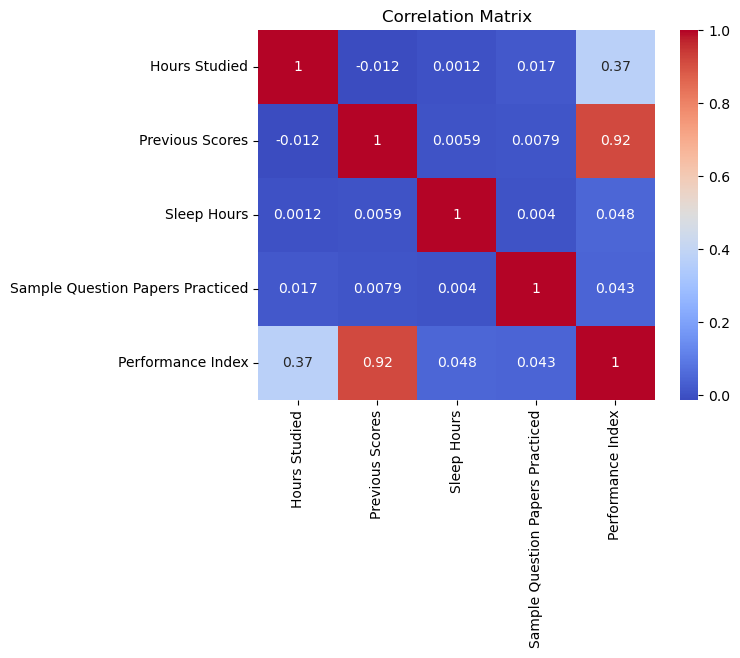

In [15]:
# Heatmap: Correlation Matrix
correlation_matrix = dataset[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

> The stongest correlation in the Correlation Matrix shows that *Performance Index* and *Previous Scores* at a 92%.

### Data preprocessing

##### Converting the data to binary label

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset["Extracurricular Activities"] = encoder.fit_transform(dataset["Extracurricular Activities"])

### Splitting the data into dependent and independent data

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the data into Training set and Test set

In [18]:
y = y.reshape(len(y), 1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Training the Test set and Training set with Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Elastinet': ElasticNet()
}

model_list = []
mse_list = []
rmse_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Get RMSE by setting squared=False
    r2_square = r2_score(y_test, y_pred)
    
    print(model_name)
    print('=' * 35)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('R-squared:', r2_square)
    print()
    
    model_list.append(model_name)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2_square)

LinearRegression
Mean Squared Error: 4.03951919169885
Root Mean Squared Error: 2.0098555151300928
R-squared: 0.9888065859708454

Lasso
Mean Squared Error: 4.850167016154998
Root Mean Squared Error: 2.2023094732927517
R-squared: 0.9865602996431018

Ridge
Mean Squared Error: 4.039526585924525
Root Mean Squared Error: 2.0098573546211
R-squared: 0.9888065654816175

Elastinet
Mean Squared Error: 4.857461788428053
Root Mean Squared Error: 2.203965015245944
R-squared: 0.986540085998253



### Visualization of the models

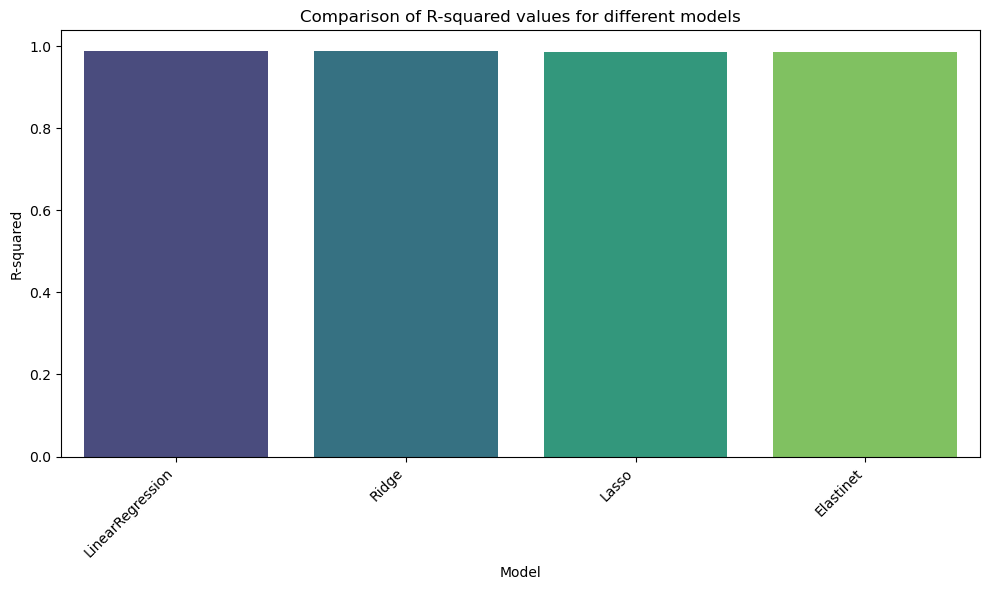

In [21]:
# Create a DataFrame to store the model names and R-squared values
result_df = pd.DataFrame({'Model': model_list, 'R-squared': r2_list})

# Sort the DataFrame by R-squared values in descending order
result_df = result_df.sort_values(by='R-squared', ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=result_df, palette='viridis')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared values for different models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# regressor = LogisticRegression()
# regressor.fit(X_train, y_train)
# pref = regressor.predict(X_test)
# print(regressor.coef_)

In [23]:
# print(regressor.intercept_)

Therefore, the equation of our multiple linear regression model is:

Student Performance = 2.85 x Hours Studied [6] + 1.02 × Previous Scores [75] + 0.62 × Extracurricular Activities [0] + 0.47 × Sleep Hours [8] + 0.19 × Sample Question [7] - 34.06

### Single Prediction

In [24]:
# result = regressor.predict([[6, 75, 0, 8, 7,]])
# print('This student is predicted to answer:', result)